In [6]:
import numpy as np
from ct_rsna import CTDataset
from torchvision import transforms
from matplotlib import pyplot as plt

In [16]:
train_dir = './data/ct-rsna/train'
val_dir = './data/ct-rsna/validation'

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(256),
    transforms.RandomHorizontalFlip(),
])


In [17]:
ct_ds = CTDataset(data_dir=train_dir, labels_path='train_set.csv', transform=transform)

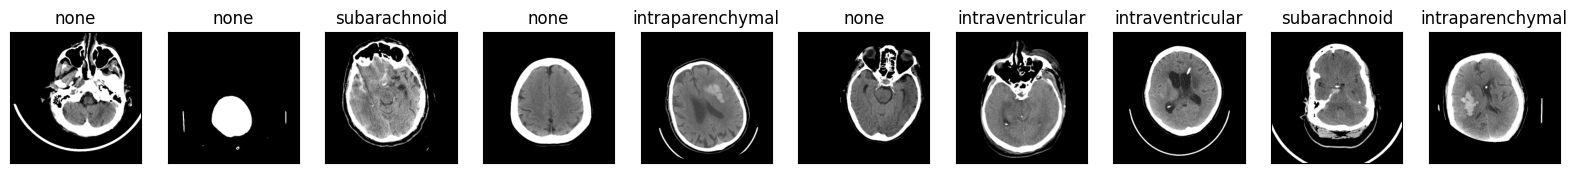

In [18]:
N = 10
plt.figure(figsize=(20, 5))
for i, idx in enumerate(np.random.choice(len(ct_ds), N)):

    x, y = ct_ds[idx]
    plt.subplot(1, N, i+1)
    plt.imshow(x.squeeze(), cmap='gray', vmin=0, vmax=1.0)
    plt.title(ct_ds.class_names[int(y)])
    plt.xticks([])
    plt.yticks([])

plt.show()